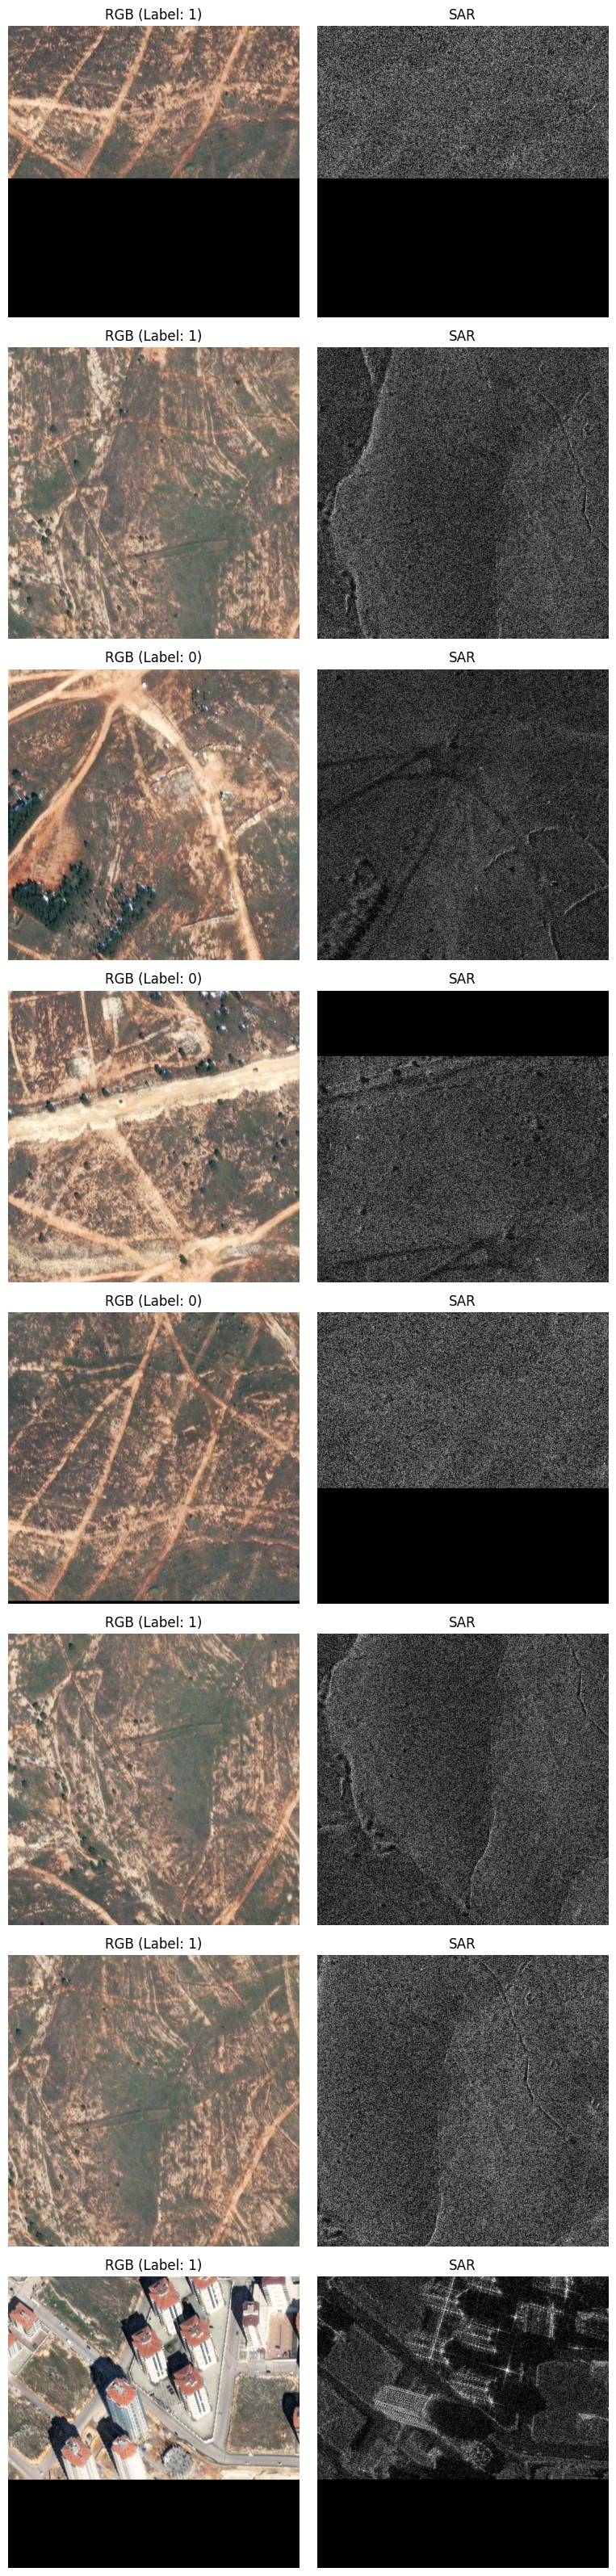

In [5]:
import os
import sys
import matplotlib.pyplot as plt
import numpy as np
import torch

#add your project root if needed
sys.path.append(os.path.abspath('/home/savvas/SUPER-NAS/USERS/Chirag/PROJECTS/202504-spacenet9/data/spacenet9-void'))

from src.datafeeder.datafeeder import get_dataloader
from src.utils.utils import Configuration

#load config
config_path = '/home/savvas/SUPER-NAS/USERS/Chirag/PROJECTS/202504-spacenet9/data/spacenet9-void/experiments/config.json'
config = Configuration(config_path)

#create dataloader with debug TIFF saving
dataloader = get_dataloader(config, debug_vis=False)

for batch in dataloader:
    inputs, labels = batch
    batch_size = labels.shape[0]

    fig, axs = plt.subplots(batch_size, 2, figsize=(8, 4 * batch_size))

    for i in range(batch_size):
        rgb = inputs[0][i].detach().cpu().numpy()
        sar = inputs[1][i].detach().cpu().numpy()
        label = labels[i].item()

        rgb_disp = np.transpose(rgb, (1, 2, 0))
        sar_disp = sar[0]

        if batch_size == 1:
            ax_rgb = axs[0]
            ax_sar = axs[1]
        else:
            ax_rgb = axs[i, 0]
            ax_sar = axs[i, 1]

        ax_rgb.imshow(np.clip(rgb_disp, 0, 1))
        ax_rgb.set_title(f"RGB (Label: {label})")
        ax_rgb.axis("off")

        ax_sar.imshow(sar_disp, cmap='gray')
        ax_sar.set_title("SAR")
        ax_sar.axis("off")

    plt.tight_layout()
    plt.show()
    break 
